****This was done for a college society selection task and sklearn was not allowed here

# Correction of misspelled words

## Aim:

In this task, I am supposed to correct misspelled career aspirations of students using Fuzzy matching algorithms.
Then I have to plot the career aspirations of the students in a bar graph.

The career options are:
1. Doctor
2. Lawyer
3. Teacher
4. Engineer
5. Accountant
6. Nurse
7. Police
8. Architect
9. Dentist
10. Pharmacist

The algorithms I have implemented here are:
- Cosine Similarity
- Jaccard Similarity
- Levenshtein Distance

## Importing the data:

In [6]:
import pandas as pd
import numpy as np
import string
import math
import matplotlib.pyplot as plt

data = pd.read_excel("TaskData.xlsx") # reading the given excel file -> enter your excel file path here
data.rename(columns={'cokter':'Career'},inplace = True) 
data.loc[len(data.index)] = ['cokter']  # cokter was coming as the column name so that is changed to career and I have added cokter as the last element of the dataframe

In [7]:
data

Career
0      dentiists
1        Enginir
2         PoLICE
3      engneiear
4         DOcTRO
...          ...
1401  aCcountANT
1402  accountant
1403      POlIcE
1404    enjineer
1405      cokter

[1406 rows x 1 columns]

In [8]:
for i in range(0,len(data)):
    data['Career'][i]=data['Career'][i].upper().strip() #Converting all the data to upper case
data 

Career
0      DENTIISTS
1        ENGINIR
2         POLICE
3      ENGNEIEAR
4         DOCTRO
...          ...
1401  ACCOUNTANT
1402  ACCOUNTANT
1403      POLICE
1404    ENJINEER
1405      COKTER

[1406 rows x 1 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1405
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Career  1406 non-null   object
dtypes: object(1)
memory usage: 54.3+ KB


In [10]:
list_careers=['DOCTOR','LAWYER','TEACHER','ENGINEER','ACCOUNTANT','NURSE','POLICE','ARCHITECT','DENTIST','PHARMACIST']

----------------------------------------------------------------------------------------------------------------------------------------

## Fuzzy matching algorithms:

----------------------------------------------------------------------------------------------------------------------------------------

### 1. Vectorization and cosine similarity:

----------------------------------------------------------------------------------------------------------------------------------------

In this algorithm, we first convert the misspelled words and also the correct words into vectors.
I have done the vectorization by taking a 26 sized numpy array and at all the indices, the frequency of every alphabet in it.
Then I have performed vector dot product and found the cosine similarity.
Then I chose the pair with the highest value of cosine similarity and corrected it accordingly.

In [11]:
datas=data
datas['Vector']=[None]*len(datas) #Here I have created a new column to store the letters of the words as vectors

In [12]:
for i in range(len(datas)):
    vect=np.zeros(shape=[26],dtype=int)
    for j in datas['Career'][i]:
        vect[ord(j)-65] = vect[ord(j)-65]+1
    datas['Vector'][i]=vect

datas # stores vectors of every word in the dataset

Career                                             Vector
0      DENTIISTS  [0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, ...
1        ENGINIR  [0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, ...
2         POLICE  [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...
3      ENGNEIEAR  [1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, ...
4         DOCTRO  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...
...          ...                                                ...
1401  ACCOUNTANT  [2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ...
1402  ACCOUNTANT  [2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ...
1403      POLICE  [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...
1404    ENJINEER  [0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, ...
1405      COKTER  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...

[1406 rows x 2 columns]

In [13]:
list_careers_vectors=[]
for i in range(0,10):
    vect=np.zeros(shape=[26],dtype=int)
    for j in list_careers[i]:
        vect[ord(j)-65] = vect[ord(j)-65]+1
    list_careers_vectors.append(vect)

list_careers_vectors #Stores vectors of the standard career options

[array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0]),
 array([1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0,
        0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0,
        0, 0, 0, 0]),
 array([2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0])]

* Here I have vectorized every word by storing the number of occurrences of every letter in a 26-sized nupmy array and I will use this to perform cosine similarity on every word with the standard words and convert them accordingly.

In [14]:
correction_list=[]
for i in range(len(datas)):
    cosine_similarities=np.zeros(shape=[10],dtype=float) # Initialising numpy array of cosine similarities which will store the 10 values for cosine similarity of a word with each of the 10 standard career options.
    for j in range(0,10):
        x=math.sqrt(sum(np.square(datas['Vector'][i]))) # gets |A|
        y=math.sqrt(sum(np.square(list_careers_vectors[j]))) # gets |B|
        cosine_sim=np.dot(datas['Vector'][i],list_careers_vectors[j])/(x*y) # gets A.B/|A||B|
        cosine_similarities[j]=cosine_sim # Each value stored in a list
    max_idx=np.argmax(cosine_similarities) # Gets index of the maximum value of cosine similarity
    correction_list.append(list_careers[max_idx]) # Corrected value gets appended to the list


* Here I have made a correction_list which will store the corrected career names.
* There is a loop that runs over datas and an inner loop that runs over the standard career options. I have found the cosine similarities of every career option entered by the student(from datas) with the standard options(list_careers) and I have used the formula:
  cosθ = A⋅B/|A||B|

  Here A represents a vector form the data entered and B represents a vector from a standard word.
  
​* Then I stored the cosine values for all the 10 standard values, and the standard word with the highest similarity is stored in the correction_list index wise.

In [15]:
data['Corrected Career path'] = correction_list

data

Career                                             Vector  \
0      DENTIISTS  [0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, ...   
1        ENGINIR  [0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, ...   
2         POLICE  [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...   
3      ENGNEIEAR  [1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, ...   
4         DOCTRO  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...   
...          ...                                                ...   
1401  ACCOUNTANT  [2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ...   
1402  ACCOUNTANT  [2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ...   
1403      POLICE  [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...   
1404    ENJINEER  [0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, ...   
1405      COKTER  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...   

     Corrected Career path  
0                  DENTIST  
1                 ENGINEER  
2                   POLICE  
3                 ENGINEER  
4                   DOCTOR  
...                    ...  
1401            ACCOUNTANT  
1402            ACCOUNTANT  
1403                POLICE  
1404              ENGINEER  
1405                DOCTOR  

[1406 rows x 3 columns]

* Here we can see that we have correctly corrected all the words and now we can plot the bar graph to find the actual data of the career aspirations of the students.

In [16]:
counts=np.zeros(shape=[10],dtype=int)
for i in correction_list:
    for j in range(0,10):
        if i == list_careers[j]:
            counts[j]=counts[j]+1
            break

counts # stores count of every career option in the order of list_careers

array([191,  82, 209, 328,  34,  85, 162,  70, 192,  53])

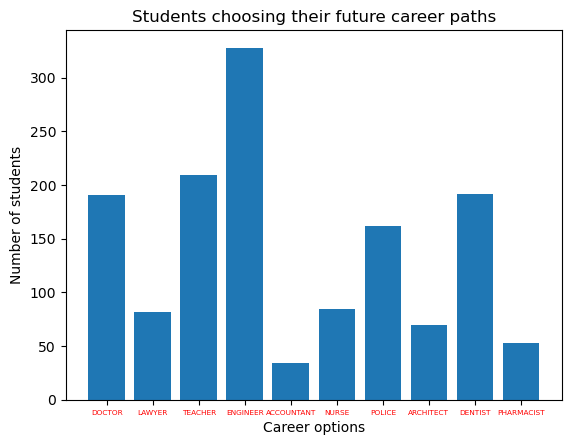

In [17]:
plt.bar(list_careers,counts)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

* The above bar graph clearly shows the number of students who taking up different careers in the future.
* Below I have printed the career choice vs the number of students as a dataframe also

In [18]:
students_career_choices={'Career':list_careers,'Number of students':counts}

students_career_choices_df=pd.DataFrame(students_career_choices)

students_career_choices_df

Career  Number of students
0      DOCTOR                 191
1      LAWYER                  82
2     TEACHER                 209
3    ENGINEER                 328
4  ACCOUNTANT                  34
5       NURSE                  85
6      POLICE                 162
7   ARCHITECT                  70
8     DENTIST                 192
9  PHARMACIST                  53

In [19]:
data.to_excel('Cosine_similarity_correction.xlsx', index=False, sheet_name='Sheet1')

This creates an excel file comparing the incorrect words and the corrected words by this method. It is not very accurate as I observed it and has a few errors.

----------------------------------------------------------------------------------------------------------------------------------------

### 2. Jaccard Similarity:

----------------------------------------------------------------------------------------------------------------------------------------

Here, in a loop, we will store the letters of every subsequent misspelled word in a set, and also letters of the standard words in another set in another loop. Then we will compare these two sets in every loop find Jaccard_similarity = n(A intersection B)/n(A union B) and the word with its highest value for this Jaccard similarity will be the corrected word.

In [20]:
def Jaccard_similarity(setA,setB):
    intersect = setA.intersection(setB)
    union = setA.union(setB)
    return len(intersect)/len(union)

* This code finds the value of n(A intersect B)/ n(A U B) which is the Jaccard similarity value.

In [21]:
correction_list_jaccard=[] # Initialising list of corrected words
for i in datas['Career']:
    setA=set(i) # Setting setA as the word to be corrected in the iteration
    jacc_similarity=np.zeros(shape=[10],dtype=float) # initialising numpy array of size 10 to store jaccard similarity values with 10 standard words
    for j in range(0,10):
        setB=set(list_careers[j]) # setting setB as a standard word in each iteration
        jacc_similarity[j]=Jaccard_similarity(setA,setB) # storing Jaccard similarity values of each of the 10 words in jacc_similarity list
    max_idx=np.argmax(jacc_similarity) # getting index of max Jaccard similarity value
    correction_list_jaccard.append(list_careers[max_idx]) # Making the corrected list in correct order

* This code corrects every misspelled word in the given data by finding the maximum Jaccard similarity value with the standard words

In [22]:
corrected_by_jaccard = pd.DataFrame({'Career':data['Career'],'Corrected career path':correction_list_jaccard})
corrected_by_jaccard

Career Corrected career path
0      DENTIISTS               DENTIST
1        ENGINIR              ENGINEER
2         POLICE                POLICE
3      ENGNEIEAR              ENGINEER
4         DOCTRO                DOCTOR
...          ...                   ...
1401  ACCOUNTANT            ACCOUNTANT
1402  ACCOUNTANT            ACCOUNTANT
1403      POLICE                POLICE
1404    ENJINEER              ENGINEER
1405      COKTER                DOCTOR

[1406 rows x 2 columns]

This dataframe shows the corrected career names along with the misspelled names - done by using Jaccard Similarity algorithm

In [23]:
counts_jacc=np.zeros(shape=[10],dtype=int)
for i in corrected_by_jaccard['Corrected career path']:
    for j in range(0,10):
        if i == list_careers[j]:
            counts_jacc[j]=counts_jacc[j]+1

counts_jacc # stores count of students who have taken career choices in the order of list_careers

array([210,  82, 213, 330,  32,  83, 162,  60, 192,  42])

In [24]:
students_career_choices_jacc = pd.DataFrame({'Career':list_careers,'Number of students':counts_jacc})

students_career_choices_jacc # Data from Jaccard similarity method

Career  Number of students
0      DOCTOR                 210
1      LAWYER                  82
2     TEACHER                 213
3    ENGINEER                 330
4  ACCOUNTANT                  32
5       NURSE                  83
6      POLICE                 162
7   ARCHITECT                  60
8     DENTIST                 192
9  PHARMACIST                  42

We can see that there is slight derivation of this data from the data by cosine similarity method.
The data from cosine similarity method looked like this:

In [25]:
students_career_choices_df # Data from cosine similarity method

Career  Number of students
0      DOCTOR                 191
1      LAWYER                  82
2     TEACHER                 209
3    ENGINEER                 328
4  ACCOUNTANT                  34
5       NURSE                  85
6      POLICE                 162
7   ARCHITECT                  70
8     DENTIST                 192
9  PHARMACIST                  53

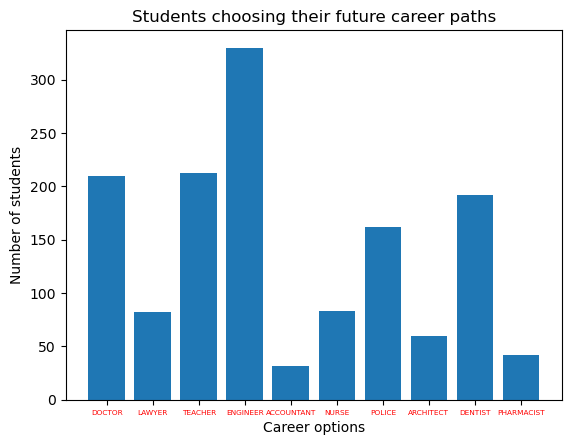

In [26]:
plt.bar(list_careers,counts_jacc)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

* This bar graph shows the data given by Jaccard-Similarity method

In [27]:
corrected_by_jaccard.to_excel('Jaccard_correction.xlsx', index=False, sheet_name='Sheet1')

This creates an excel file comparing the incorrect words and the corrected words by this method. It is very accurate as I observed it.

----------------------------------------------------------------------------------------------------------------------------------------

### 3. Levenshtein Distance:

----------------------------------------------------------------------------------------------------------------------------------------

In [28]:
def Levenshtein_Distance(word1, word2):
    len1 = len(word1)
    len2 = len(word2)
    dp = np.zeros((len1 + 1, len2 + 1), dtype=int)
    
    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j
    
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1
    print(dp)
    return dp[len1][len2]
    

- This is the function to find out the Levenshtein distance between two words.

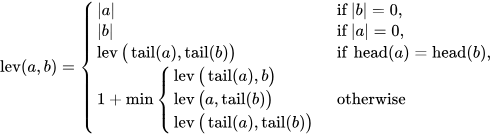

The above formula describes the Levenshtein distance as a picewise defined function (Taken from wikipedia) which I have implemented here.

In [29]:
correction_list_levenshtein=[] # Initialising list of corrected words
for i in datas['Career']:
    levenshtein_distance=np.zeros(shape=[10],dtype=float) # initialising numpy array of size 10 to store Levenshtein distance values with 10 standard words
    for j in range(0,10):
        levenshtein_distance[j]=Levenshtein_Distance(i,list_careers[j]) # storing Levenshtein Distance values of each of the 10 words in levenshtein_distance list
    min_idx=np.argmin(levenshtein_distance) # getting index of min Levenshtein distance value
    correction_list_levenshtein.append(list_careers[min_idx]) # Making the corrected list in correct order

[[0 1 2 3 4 5 6]
 [1 0 1 2 3 4 5]
 [2 1 1 2 3 4 5]
 [3 2 2 2 3 4 5]
 [4 3 3 3 2 3 4]
 [5 4 4 4 3 3 4]
 [6 5 5 5 4 4 4]
 [7 6 6 6 5 5 5]
 [8 7 7 7 6 6 6]
 [9 8 8 8 7 7 7]]
[[0 1 2 3 4 5 6]
 [1 1 2 3 4 5 6]
 [2 2 2 3 4 4 5]
 [3 3 3 3 4 5 5]
 [4 4 4 4 4 5 6]
 [5 5 5 5 5 5 6]
 [6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9]]
[[0 1 2 3 4 5 6 7]
 [1 1 2 3 4 5 6 7]
 [2 2 1 2 3 4 5 6]
 [3 3 2 2 3 4 5 6]
 [4 3 3 3 3 4 5 6]
 [5 4 4 4 4 4 5 6]
 [6 5 5 5 5 5 5 6]
 [7 6 6 6 6 6 6 6]
 [8 7 7 7 7 7 7 7]
 [9 8 8 8 8 8 8 8]]
[[0 1 2 3 4 5 6 7 8]
 [1 1 2 3 4 5 6 7 8]
 [2 1 2 3 4 5 5 6 7]
 [3 2 1 2 3 4 5 6 7]
 [4 3 2 2 3 4 5 6 7]
 [5 4 3 3 2 3 4 5 6]
 [6 5 4 4 3 3 4 5 6]
 [7 6 5 5 4 4 4 5 6]
 [8 7 6 6 5 5 5 5 6]
 [9 8 7 7 6 6 6 6 6]]
[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 1  1  2  3  4  5  6  7  8  9 10]
 [ 2  2  2  3  4  5  6  7  8  9 10]
 [ 3  3  3  3  4  5  5  6  7  8  9]
 [ 4  4  4  4  4  5  6  5  6  7  8]
 [ 5  5  5  5  5  5  6  6  6  7  8]
 [ 6  6  6  6  6  6  6  7  7  7  8]
 [ 7

* This code corrects every misspelled word in the given data by finding the minimum Levenshtein distance value with the standard words

In [30]:
corrected_by_levenshtein = pd.DataFrame({'Career':data['Career'],'Corrected career path':correction_list_levenshtein})
corrected_by_levenshtein

Career Corrected career path
0      DENTIISTS               DENTIST
1        ENGINIR              ENGINEER
2         POLICE                POLICE
3      ENGNEIEAR              ENGINEER
4         DOCTRO                DOCTOR
...          ...                   ...
1401  ACCOUNTANT            ACCOUNTANT
1402  ACCOUNTANT            ACCOUNTANT
1403      POLICE                POLICE
1404    ENJINEER              ENGINEER
1405      COKTER                DOCTOR

[1406 rows x 2 columns]

In [31]:
counts_lev=np.zeros(shape=[10],dtype=int)
for i in corrected_by_levenshtein['Corrected career path']:
    for j in range(0,10):
        if i == list_careers[j]:
            counts_lev[j]=counts_lev[j]+1

counts_lev # stores count of students who have taken career choices in the order of list_careers

array([225,  82, 195, 328,  32,  85, 162,  63, 192,  42])

In [32]:
students_career_choices_lev = pd.DataFrame({'Career':list_careers,'Number of students':counts_lev})

students_career_choices_lev # Data from Levenshtein distance method

Career  Number of students
0      DOCTOR                 225
1      LAWYER                  82
2     TEACHER                 195
3    ENGINEER                 328
4  ACCOUNTANT                  32
5       NURSE                  85
6      POLICE                 162
7   ARCHITECT                  63
8     DENTIST                 192
9  PHARMACIST                  42

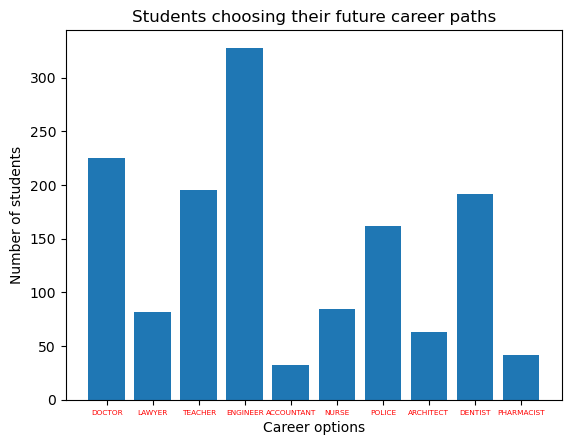

In [33]:
plt.bar(list_careers,counts_lev)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

* This bar graph shows the data given by Levenshtein-distance method

In [34]:
corrected_by_levenshtein.to_excel('levenshtein_correction.xlsx', index=False, sheet_name='Sheet1')

This creates an excel file comparing the incorrect words and the corrected words by this method. It is also very accurate as I observed it.

----------------------------------------------------------------------------------------------------------------------------------------

## Summing up the data from the three methods:

### Cosine Similarity:

In [35]:
students_career_choices_df

Career  Number of students
0      DOCTOR                 191
1      LAWYER                  82
2     TEACHER                 209
3    ENGINEER                 328
4  ACCOUNTANT                  34
5       NURSE                  85
6      POLICE                 162
7   ARCHITECT                  70
8     DENTIST                 192
9  PHARMACIST                  53

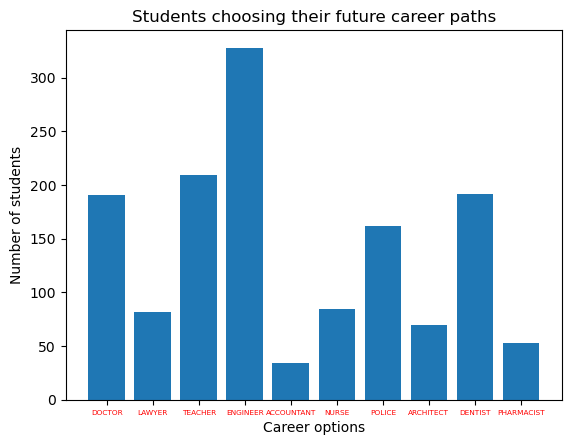

In [36]:
plt.bar(list_careers,counts)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

- This data had quite many errors as I observed it from the excel sheet created.

### Jaccard Similarity:

In [37]:
students_career_choices_jacc # Data from Jaccard similarity method

Career  Number of students
0      DOCTOR                 210
1      LAWYER                  82
2     TEACHER                 213
3    ENGINEER                 330
4  ACCOUNTANT                  32
5       NURSE                  83
6      POLICE                 162
7   ARCHITECT                  60
8     DENTIST                 192
9  PHARMACIST                  42

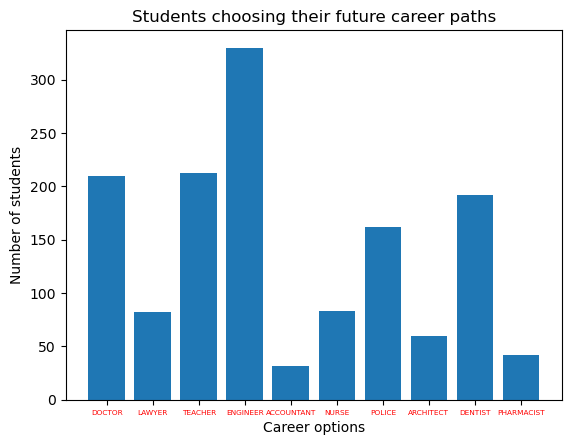

In [38]:
plt.bar(list_careers,counts_jacc)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

- This data was much more accurate as observed from the excel sheet.

### Levenshtein Distance:

In [39]:
students_career_choices_lev # Data from Levenshtein distance method

Career  Number of students
0      DOCTOR                 225
1      LAWYER                  82
2     TEACHER                 195
3    ENGINEER                 328
4  ACCOUNTANT                  32
5       NURSE                  85
6      POLICE                 162
7   ARCHITECT                  63
8     DENTIST                 192
9  PHARMACIST                  42

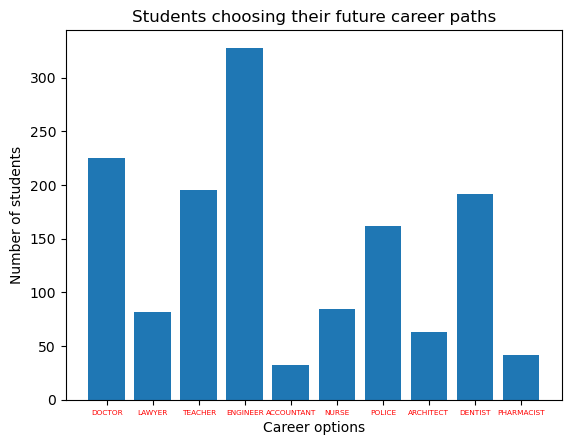

In [40]:
plt.bar(list_careers,counts_lev)
plt.xticks(fontsize=5.3,color='red')
plt.xlabel('Career options')
plt.ylabel('Number of students')
plt.title('Students choosing their future career paths')
plt.show()

- This data was also very accurate as observed from the excel sheet created.

----------------------------------------------------------------------------------------------------------------------------------------